In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd
import collections
import imageio
import seaborn as sns

import numpy as np
import scipy.stats as stats
import math
from slicer_func import *
from graph_func import *


### Generate data

#### Separated data

Text(0.5, 1.0, 'N = 100; 4 clusters; 1 variance')

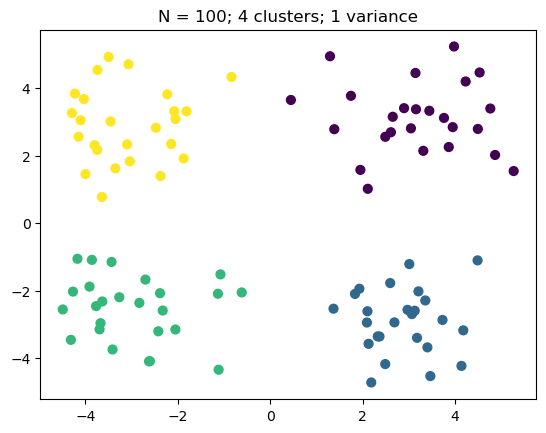

In [2]:
n_samples = 100; centers=4; cluster_std = 1; random_state = 0
centers_list = [[3,3],[3,-3],[-3,-3],[-3,3]]
X_separated, y_true_separated, centers_true_separated = make_blobs(n_samples=n_samples, centers=centers_list,
                       cluster_std=cluster_std, random_state=random_state, return_centers=True)

plt.scatter(X_separated[:, 0], X_separated[:, 1], c=y_true_separated, s=40, cmap='viridis')
plt.title("N = " + str(n_samples) + "; " + str(centers) + " clusters; " + str(cluster_std) + " variance")

#### Overlapping case


Text(0.5, 1.0, 'N = 100; 4 clusters; 1 variance')

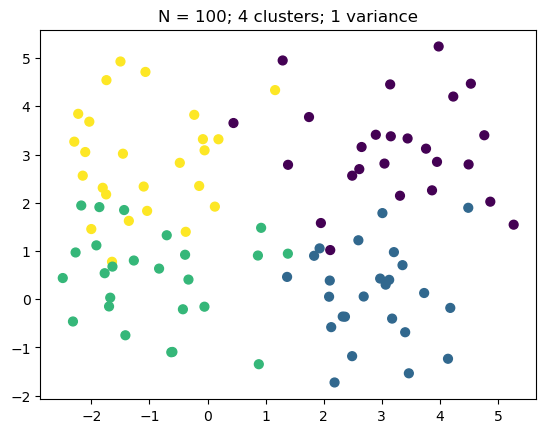

In [3]:
n_samples = 100; centers=4; cluster_std = 1; random_state = 0
centers_list = [[3,3],[3,0],[-1,0],[-1,3]]
X, y_true, centers_true = make_blobs(n_samples=n_samples, centers=centers_list,
                       cluster_std=cluster_std, random_state=random_state, return_centers=True)

plt.scatter(X[:, 0], X[:, 1], c=y_true, s=40, cmap='viridis')
plt.title("N = " + str(n_samples) + "; " + str(centers) + " clusters; " + str(cluster_std) + " variance")

### Initialise parameters

#### Step 1
$$\mu_j|... = N(\frac{1}{m+1}\sum_{i=1}^{m}y_i, \frac{1}{m+1})$$

#### Step 2

Sample $v_j \propto Beta(v_j; a_j, b_j)$ where,

$a_j = 1 + \sum_{i=1}^n\mathbf{1}(d_i = j)$ (i.e., 1 plus the number of observations allocated to cluster j)

$b_j = c + \sum_{i=1}^n\mathbf{1}(d_i > j)$

#### Step 3

Sample $u_i|... \propto \mathbf{1}(0 < u_i < w_{d_i})$

I.e., u is uniformly distributed with support $[0, w_{d_i}]$ 

#### Step 4

Sample $P(d_i = k|...) \propto \mathbf{1}(k: w_k > u_i)N(y_i; \mu_k)$

Probability that observation i belongs to cluster k (conditional on the data, current cluster means, etc.) is proportional to a gaussian current mean $\mu_k$ evaluated for observation i given that the cluster is defined (else the probability = 0).

In [4]:
### Separated case
m_0, cluster_counts,d_0, labels, estimated_mu,all_mus = slicey_time(X = X_separated, K = len(X_separated), max_iter = 100)

iteration 0
# clusters: [37]
iteration 1
# clusters: [24]
iteration 2
# clusters: [17]
iteration 3
# clusters: [16]
iteration 4
# clusters: [13]
iteration 5
# clusters: [13]
iteration 6
# clusters: [12]
iteration 7
# clusters: [9]
iteration 8
# clusters: [9]
iteration 9
# clusters: [9]
iteration 10
# clusters: [8]
iteration 11
# clusters: [7]
iteration 12
# clusters: [5]
iteration 13
# clusters: [5]
iteration 14
# clusters: [5]
iteration 15
# clusters: [5]
iteration 16
# clusters: [5]
iteration 17
# clusters: [5]
iteration 18
# clusters: [5]
iteration 19
# clusters: [5]
iteration 20
# clusters: [5]
iteration 21
# clusters: [5]
iteration 22
# clusters: [5]
iteration 23
# clusters: [5]
iteration 24
# clusters: [5]
iteration 25
# clusters: [5]
iteration 26
# clusters: [5]
iteration 27
# clusters: [5]
iteration 28
# clusters: [5]
iteration 29
# clusters: [5]
iteration 30
# clusters: [4]
iteration 31
# clusters: [4]
iteration 32
# clusters: [4]
iteration 33
# clusters: [4]
iteration 34
# cl

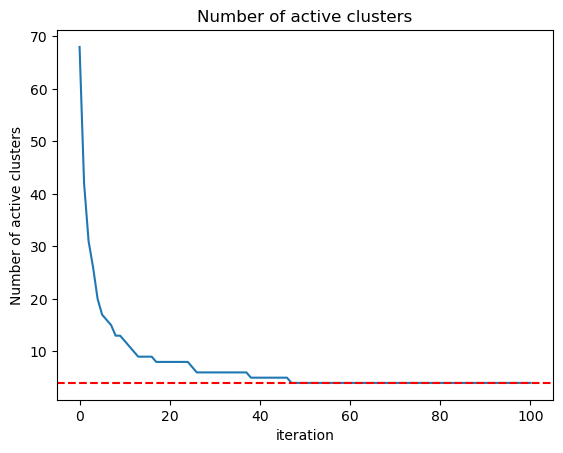

In [14]:
### Plot convergence 
t = range(0, 100 + 1)

plt.plot(t, cluster_counts)
plt.xlabel('iteration')
plt.ylabel('Number of active clusters')
plt.title('Number of active clusters')

# plt.title('Slicey_time convergence')
plt.axhline(y = 4, linestyle='--', color='red')
plt.savefig(f'images/number_of_active_clusters.png', 
                transparent = False,  
                facecolor = 'white')

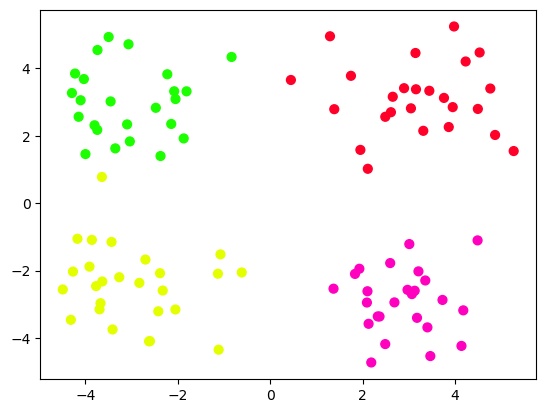

In [6]:
plt.scatter(X_separated[:, 0], X_separated[:, 1], c=d_0, s=40, cmap='gist_rainbow');

Text(0.5, 1.0, 'True vs. estimated cluster centres')

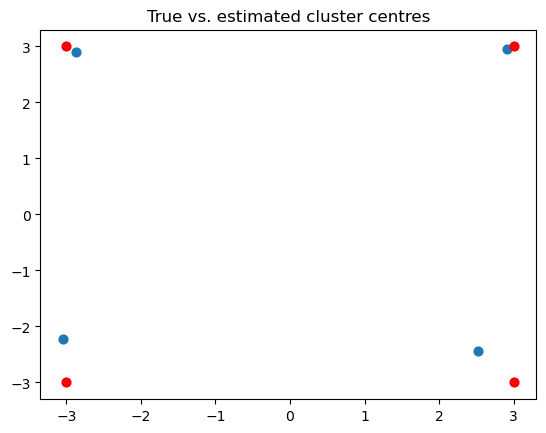

In [7]:
### Plot true means vs estimated means
non_zero_clusters = [key for key, value in m_0.items() if value > 0]
estimated_m = estimated_mu[non_zero_clusters]

plt.scatter(estimated_m[:, 0], estimated_m[:, 1], s=40, cmap='viridis')
plt.scatter(centers_true_separated[:, 0], centers_true_separated[:, 1], s=40, color = 'red')
plt.title('True vs. estimated cluster centres')

In [8]:
labels_gif(X_separated,labels, title='Separated', filename = "Separated")

In [9]:
plot_traceplot(all_mus,X_separated, title ="Separated Traceplot to save")

In [16]:
### Overlapping case
m_0_2, cluster_counts_2,d_0_2, labels_2, estimated_mu_2,all_mus2 = slicey_time(X = X, K = len(X), max_iter = 100,var_y=1)

iteration 0
# clusters: [38]
iteration 1
# clusters: [30]
iteration 2
# clusters: [20]
iteration 3
# clusters: [17]
iteration 4
# clusters: [16]
iteration 5
# clusters: [15]
iteration 6
# clusters: [12]
iteration 7
# clusters: [12]
iteration 8
# clusters: [12]
iteration 9
# clusters: [11]
iteration 10
# clusters: [10]
iteration 11
# clusters: [9]
iteration 12
# clusters: [9]
iteration 13
# clusters: [9]
iteration 14
# clusters: [9]
iteration 15
# clusters: [9]
iteration 16
# clusters: [9]
iteration 17
# clusters: [7]
iteration 18
# clusters: [6]
iteration 19
# clusters: [6]
iteration 20
# clusters: [6]
iteration 21
# clusters: [6]
iteration 22
# clusters: [6]
iteration 23
# clusters: [6]
iteration 24
# clusters: [6]
iteration 25
# clusters: [5]
iteration 26
# clusters: [5]
iteration 27
# clusters: [5]
iteration 28
# clusters: [5]
iteration 29
# clusters: [5]
iteration 30
# clusters: [5]
iteration 31
# clusters: [4]
iteration 32
# clusters: [4]
iteration 33
# clusters: [4]
iteration 34


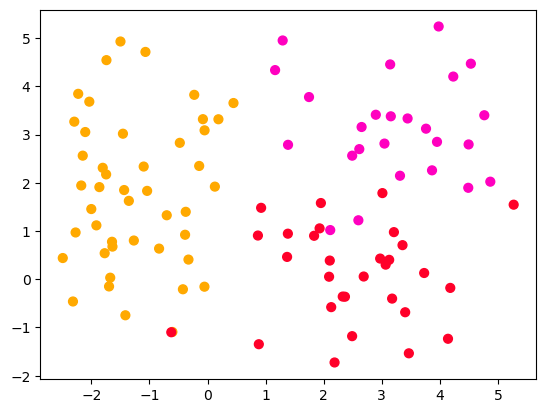

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=d_0_2, s=40, cmap='gist_rainbow');

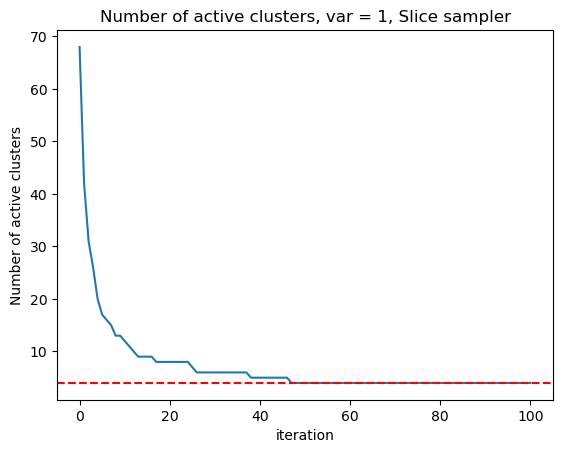

In [18]:
### Plot convergence 
t = range(0, 100 + 1)

plt.plot(t, cluster_counts)
plt.xlabel('iteration')
plt.ylabel('Number of active clusters')

plt.title('Number of active clusters, var = 1, Slice sampler')
# plt.title('Slicey_time convergence')
plt.axhline(y = 4, linestyle='--', color='red')
plt.savefig(f'images/number_of_active_clusters.png', 
                transparent = False,  
                facecolor = 'white')

Text(0.5, 1.0, 'True vs. estimated cluster centres')

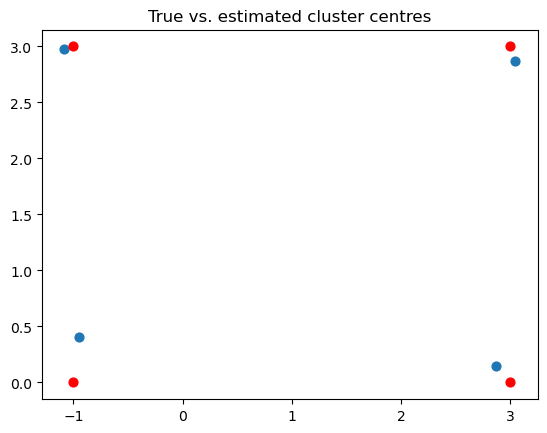

In [13]:
### Plot true means vs estimated means
non_zero_clusters = [key for key, value in m_0_2.items() if value > 0]
estimated_m_2 = estimated_mu_2[non_zero_clusters]

plt.scatter(estimated_m_2[:, 0], estimated_m_2[:, 1], s=40, cmap='viridis')
plt.scatter(centers_true[:, 0], centers_true[:, 1], s=40, color = 'red')
plt.title('True vs. estimated cluster centres')

We can compare the labelings to the "ground truth" for a known distribution. See documentation: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [14]:
### Assess accuracy - separated case
metrics.adjusted_rand_score(y_true_separated, d_0)

0.97305763367046

In [15]:
### Assess accuracy - overlapping case
metrics.adjusted_rand_score(y_true, d_0_2)

0.97305763367046

In [16]:
plot_traceplot(all_mus2,X, title ="Not Separated Traceplot to save")

In [17]:
labels_gif(X,labels_2, title='Not Separated', filename = "Not Separated")

In [18]:
# df = pd.DataFrame(columns=["n_clusters","variance","algorithm","accuracy","iterations","time"])
n_clust = 4 #[4,10,20]
# n_tests = 10
variances = [0.6,1,1.2]
n_samples = 100
iters = 100 

# filename = "slicer_results_new.csv"
# dir = '/content/gdrive/My Drive/nonparametric'

# counter = 0
# total = len(n_clusters)*len(variances)*len(iters)
# for n_clust in n_clusters:
for var in variances:
  print(f'Running experiment for: {n_clust} clusters with variance {var}')
  X, y_true, centers_true = make_blobs(n_samples=n_samples, centers=n_clust,
                    cluster_std=var, random_state=0, return_centers=True)

# st = time.time()
  m_0, cluster_counts,y_pred, labels_array, mu_vec,all_cluster_centers = slicey_time(X = X, 
                                                                                      K = len(X), max_iter = iters,var_y=var,verbose=False)
  plot_traceplot(all_cluster_centers,X, title =f"Slicer Traceplot\n {n_clust}  clusters, {var} variance, Color = cluster")
  

Running experiment for: 4 clusters with variance 0.6
Running experiment for: 4 clusters with variance 1
Running experiment for: 4 clusters with variance 1.2


In [13]:
n_clust = 4 #[4,10,20]
# # n_tests = 10
variances = [1]#0.8,1,\
n_samples = 100
iters = 100 

# # filename = "slicer_results_new.csv"
# # dir = '/content/gdrive/My Drive/nonparametric'

# # counter = 0
# # total = len(n_clusters)*len(variances)*len(iters)
# # for n_clust in n_clusters:
for vary in variances:
  print(f'Running experiment for: {n_clust} clusters with variance {vary}')
  X, y_true, centers_true = make_blobs(n_samples=n_samples, centers=centers_list,
                       cluster_std=cluster_std, random_state=random_state, return_centers=True)

# # st = time.time()
  m_0, cluster_counts,y_pred, labels_array, mu_vec,all_cluster_centers = slicey_time(X = X, K = len(X), max_iter = iters,var_y=vary,verbose=False)
  # plot_traceplot(all_cluster_centers,X, title =f"Slicer Traceplot\n {n_clust}  clusters, {vary} variance, Color = cluster")
  # fig = plt.figure(figsize=(6, 6))
  # plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='gist_rainbow')
  # plt.savefig(f'images/trace_plots/layout_ypred_var{vary}.png', 
  #                 transparent = False,  
  #                 facecolor = 'white')
  # plt.close()

  # labels_gif(X,labels_array, title=f'var = {vary}', filename = f"{vary}",pompom=False)
  labels_gif(X,labels_array, title=f'var = {vary}', filename = f"pom{vary}",pompom=True)
  

Running experiment for: 4 clusters with variance 1
